=============================== SNR :  0.015
INFO:tensorflow:Using config: {'_master': '', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': None, '_task_id': 0, '_num_ps_replicas': 0, '_save_checkpoints_steps': 10000000000, '_environment': 'local', '_save_checkpoints_secs': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2ab9e8c304e0>, '_session_config': None, '_evaluation_master': '', '_is_chief': True, '_model_dir': '/tmp/tf_lin', '_num_worker_replicas': 0, '_keep_checkpoint_max': 5, '_save_summary_steps': 50, '_log_step_count_steps': 100, '_task_type': None}
INFO:tensorflow:Calling model_fn.
Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_i

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tf_lin/model.ckpt-3216
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-12-17:25:46
INFO:tensorflow:Saving dict for global step 3216: accuracy = 0.0149867395, global_step = 3216, loss = 0.015020406
{'accuracy': 0.0149867395, 'global_step': 3216, 'loss': 0.015020406}
=============================== SNR :  0.07
INFO:tensorflow:Using config: {'_master': '', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': None, '_task_id': 0, '_num_ps_replicas': 0, '_save_checkpoints_steps': 10000000000, '_environment': 'local', '_save_checkpoints_secs': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2aba6ff87828>, '_session_config': None, '_evaluation_master': '', '_is_chief': True, '_model_dir': '/tmp/tf_lin', '_num_worker

INFO:tensorflow:Saving checkpoints for 6432 into /tmp/tf_lin/model.ckpt.
INFO:tensorflow:Loss for final step: 0.001873078.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-12-17:36:39
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tf_lin/model.ckpt-6432
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-12-17:36:39
INFO:tensorflow:Saving dict for global step 6432: accuracy = 0.0021080843, global_step = 6432, loss = 0.0021383555
{'accuracy': 0.0021080843, 'global_step': 6432, 'loss': 0.0021383555}
=============================== SNR :  0.125
INFO:tensorflow:Using config: {'_master': '', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': None, '_task_id': 0, '_num_ps_replicas': 0, '_save_checkpoints_steps': 10000000000, '_environment': 'local', '_save_checkpoints_secs': None, '_tf_config': gpu_o

INFO:tensorflow:global_step/sec: 4.92682
INFO:tensorflow:step = 9377, loss = 0.00065990735 (20.297 sec)
INFO:tensorflow:global_step/sec: 4.94641
INFO:tensorflow:step = 9477, loss = 0.0006321692 (20.216 sec)
INFO:tensorflow:global_step/sec: 4.9476
INFO:tensorflow:step = 9577, loss = 0.0005916629 (20.214 sec)
INFO:tensorflow:Saving checkpoints for 9648 into /tmp/tf_lin/model.ckpt.
INFO:tensorflow:Loss for final step: 0.00062088337.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-12-17:47:36
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tf_lin/model.ckpt-9648
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-12-17:47:36
INFO:tensorflow:Saving dict for global step 9648: accuracy = 0.0006258144, global_step = 9648, loss = 0.00062389433
{'accuracy': 0.0006258144, 'global_step': 9648, 'loss': 0.00062389433

SystemExit: 

/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


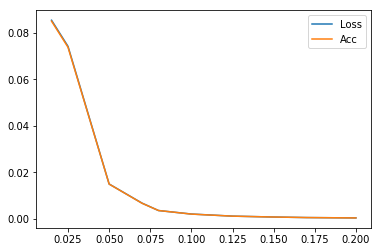

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
    
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

N_DIGITS = 1
X_FEATURE = 'x'  # Name of the input feature.

RATE=4096
BATCH = 128
gloss=[]
gacc=[]


def variable_summaries(var):
    """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
    with tf.name_scope('summaries'):
      mean = tf.reduce_mean(var)
      tf.summary.scalar('mean', mean)
      with tf.name_scope('stddev'):
         stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
      tf.summary.scalar('stddev', stddev)
      tf.summary.scalar('max', tf.reduce_max(var))
      tf.summary.scalar('min', tf.reduce_min(var))
      tf.summary.histogram('histogram', var)
    
####
####   Network architecture
####
def conv_model(features, labels, mode):
  feature = tf.reshape(features[X_FEATURE], [-1, RATE,1])
  with tf.variable_scope('conv_layer1'):
    h_conv1 = tf.layers.conv1d(feature, filters=16, kernel_size=[16], padding='same', activation=tf.nn.relu)
    variable_summaries(h_conv1)
    h_pool1 = tf.layers.max_pooling1d(h_conv1, pool_size=4, strides=4, padding='same', name='p1')
    variable_summaries(h_pool1)
  with tf.variable_scope('conv_layer2'):
    h_conv2 = tf.layers.conv1d(h_pool1, filters=32, kernel_size=[8], padding='same', activation=tf.nn.relu)
    h_pool2 = tf.layers.max_pooling1d(h_conv2, pool_size=4, strides=4, padding='same', name='p2')
    variable_summaries(h_pool2)
  with tf.variable_scope('conv_layer3'):
    h_conv3 = tf.layers.conv1d(h_pool2, filters=64, kernel_size=[8], padding='same', activation=tf.nn.relu)
    variable_summaries(h_conv3)
    h_pool3 = tf.layers.max_pooling1d(h_conv3, pool_size=4, strides=4, padding='same', name='p3')
    variable_summaries(h_pool3)
    
    dim = h_pool3.get_shape().as_list()
    fcnn = dim[1]*dim[2]
    h_pool3_flat = tf.reshape(h_pool3, [-1, fcnn])   ## linearize the matrix into 1D vector, =64*119
    #print ("================ P3F: ", mode, h_pool3_flat.get_shape())

  # Densely connected layer
  h_fc1 = tf.layers.dense(h_pool3_flat, 64, activation=tf.nn.relu, name='d1')
  #tf.summary.audio('fc1', h_fc1, RATE)
  variable_summaries(h_fc1)

  ### if mode == tf.estimator.ModeKeys.TRAIN: h_fc1 = tf.layers.dropout(h_fc1, rate=0.5)   ## dropout not used by Huerta

  ### 1-output  
  logits = tf.layers.dense(h_fc1, N_DIGITS, activation=None, name='d2')   ## No activation
  variable_summaries(logits)
  #print ("================ logits: ", mode, logits.get_shape())

  # Compute predictions
   
  predict_prob = tf.sigmoid(logits, name="sigmoid_tensor")
  variable_summaries(predict_prob)
  #predict_op   = tf.round(predict_prob)  ## return largest index

  if mode == tf.estimator.ModeKeys.PREDICT:
    predictions = {
        'freq': predict_prob,
    }
    return tf.estimator.EstimatorSpec(mode, predictions=predictions)

  # Create training op.   ## / np.sqrt(400.0)
  loss =  tf.reduce_mean(tf.square(labels - predict_prob) )
  #print ("================ loss: ", mode, loss.get_shape())

  summary_hook = tf.train.SummarySaverHook(
    save_steps=50,
    output_dir='/tmp/tf_lin',
    summary_op=tf.summary.merge_all())

  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op  = optimizer.minimize(loss, global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode, loss=loss, train_op=train_op, training_hooks=[summary_hook])

  # Compute evaluation metrics.
  eval_metric_ops = {
      #'accuracy':  tf.losses.sigmoid_cross_entropy(logits=logits, multi_class_labels=labels)
      'accuracy': tf.metrics.mean_squared_error(labels=labels, predictions=predict_prob  )
  }
  return tf.estimator.EstimatorSpec(mode, loss=loss, eval_metric_ops=eval_metric_ops)

def standarize__(y):
  mean = np.mean(y, axis=0)
  stdv = np.std(y, axis=0)
  return (y - mean) / stdv

def unit_map(y):    
    ### map to sigmoid range [0,1]
    min   = np.min(y)
    scale = 1.0/(np.max(y) - min)
    return (y-min) * scale

def prepare_data(SNR):
  N=4096
  N0=N//2
  L0=10
  dpiL0 = 2*np.pi/L0 
  coor=np.linspace(0,L0,RATE)
  y = unit_map( np.linspace(30,300,N) )
  y = y.astype(np.float32).reshape(-1,1)
  X = 1.0*( np.random.rand(N,RATE) - 0.5 ) + SNR*np.sin(np.outer(y,coor)*dpiL0 )
  X = X.astype(np.float32)
  return train_test_split(X, y, test_size=0.33, random_state=42) 

def CNN(SNR):
    tf.logging.set_verbosity(tf.logging.INFO)
    #tf.logging.set_verbosity(tf.logging.WARN)
    
    X_train, X_test, y_train, y_test = prepare_data(SNR)
    ### Download and load MNIST dataset.##mnist = tf.contrib.learn.datasets.DATASETS['mnist']('/tmp/mnist')
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x = { X_FEATURE: X_train },  y = y_train,
        batch_size = BATCH,  ### step = N / Batch * epoches
        num_epochs = 50,  shuffle=True)
    test_input_fn = tf.estimator.inputs.numpy_input_fn(
        x = { X_FEATURE: X_test },   y= y_test,
        #batch_size = None,
        num_epochs=1,   shuffle=False)

    ## Comment this to use pretrained model    
    #try: os.remove('/tmp/tf_lin/checkpoint')  
    #except OSError: pass
    
    ########## CNN
    config = tf.contrib.learn.RunConfig(
        save_checkpoints_steps=10000000000,
        save_checkpoints_secs=None,
        save_summary_steps=50,
        gpu_memory_fraction=1,
        model_dir='/tmp/tf_lin'
    )
    classifier = tf.estimator.Estimator(model_fn=conv_model, config=config)
    
    classifier.train(input_fn=train_input_fn, steps=None)
    scores = classifier.evaluate(input_fn=test_input_fn, steps=None)
    
    if 0:   ##  True  for prediction
        prediction = classifier.predict(input_fn=test_input_fn)
        i=0
        for p in prediction: 
            print (y_test[i], p)
            i = i+1
    
    print(scores)  
    return scores['loss'], scores['accuracy']

    if 0:  
        ######### Linear classifier.
        feature_columns = [ tf.feature_column.numeric_column(X_FEATURE, shape=RATE) ]

        classifier = tf.estimator.LinearClassifier(feature_columns = feature_columns, n_classes=N_DIGITS)
        classifier.train(input_fn=train_input_fn, steps=None)
        scores = classifier.evaluate(input_fn=test_input_fn, steps=None)
        print("+++++ LC: ", scores)


def main(unused):

    try: os.remove('/tmp/tf_lin/checkpoint')  
    except OSError: pass

    snr = [0.015, 0.025, 0.05, 0.07, 0.08, 0.1, 0.125, 0.15, 0.17, 0.2]
    #snr = [0.2]
    for x in snr:
        print("=============================== SNR : ", x)
        l, a = CNN(x)
        gloss.append(l)
        gacc.append(a)
    print(gloss)
    print(gacc)
    plt.plot(snr,gloss, label="Loss")
    plt.plot(snr,gacc, label="Acc")
    plt.legend()
        
if __name__ == '__main__':
  tf.app.run()
  print("End-----------------")
   

In [13]:
import numpy as np
N=10
X = np.linspace(0,100,N)
Y[:] = np.random.rand(N)[:] + X[:]
print (Y)


[   0.45825785   11.42098846   22.37824516   33.80482446   44.72431821
   55.827359     67.06720839   77.91109173   89.42842701  100.47661192]
